In [3]:
from sklearn.inspection import plot_partial_dependence
import pandas as pd
import numpy as np
import time
import warnings
import shap
from statwolfml import Builder


In [4]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
        
dataframe = pd.DataFrame(X, columns=boston.feature_names)
dataframe['target'] = y

In [5]:
features = dataframe.drop(columns={'target'}).columns

In [7]:
models_name = ['linear_regression','random_forest_regressor','cat_boost_regressor','sgd_regressor','svr']
models = {}
for model in models_name:
        build_model = Builder(model).feature_names(features).labels(['target']).build()
        train_model = build_model.train(dataframe)
        models[model] = train_model

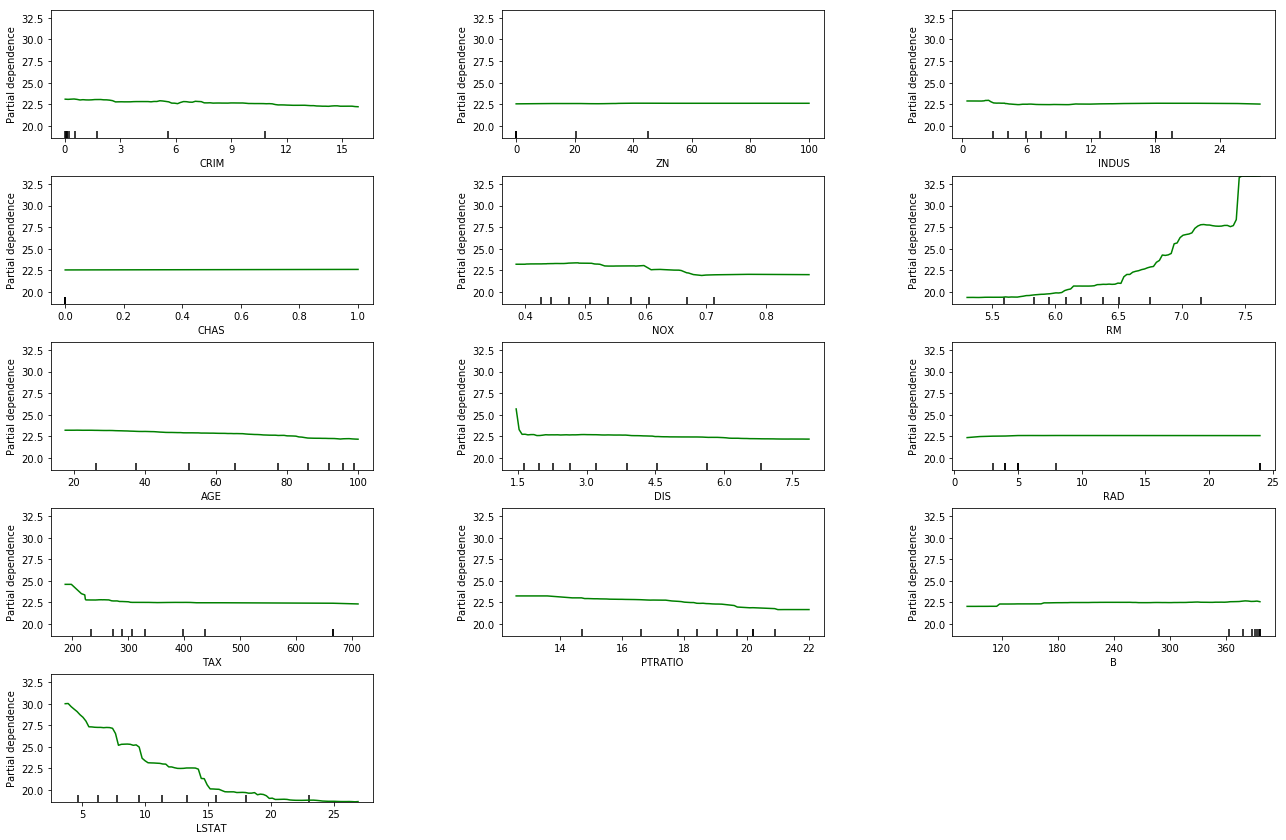

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
plot_partial_dependence(models['random_forest_regressor'].base_model()['model'], dataframe.drop(columns='target'), np.arange(0,len(features)), feature_names=features, grid_resolution=100, fig = fig) 